# LIBRERIAS

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

# Funciones
Aquí listamos las funciones que utilizamos para crear y cargar el Dataset

In [190]:
def resize_images(path_images_dir: str, height = 128, width = 128, new_dir_name = "resized_images"):
    """para un folder con imagenes, se le ingresa un path donde están todas las imagenes y crea una carpeta alterna
       que contiene todas las imágenes reescaladas (por defecto a 128x128).
    """
    images_parent = os.path.dirname(path_images_dir) if os.path.dirname(path_images_dir) else "."
    os.makedirs(f"{images_parent}/{new_dir_name}", exist_ok = True)
    images_names = os.listdir(path_images_dir)
    try:
        for image_name in images_names:
            if image_name == ".DS_Store": continue
            image_path = f"{path_images_dir}/{image_name}"
            label = image_name.split("_")[0]
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (height, width))
            cv2.imwrite(f'{images_parent}/{new_dir_name}/{image_name}', img)

        print("Las imágenes se redimensionaron correctamente")
    except:
        print("Ocurrió un error al dimensionar las imágenes del directorio", path_images_dir)


def clone_images(path_images_dir: str, clones_per_img = 100):
    images_names = os.listdir(path_images_dir)
    try:
        for image_name in images_names:
            if image_name == ".DS_Store": continue
            image_path = f"{path_images_dir}/{image_name}"
            label, rest = image_name.split("_")
            i, ext = rest.split(".")
            ext = image_name.split(".")[-1]
            img = cv2.imread(image_path)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            for j in range(0, clones_per_img):
                cv2.imwrite(f"{path_images_dir}/{label}_{i}_{j+1}.{ext}", img)
        print("Se clonaron todas las imágenes correctamente")
    except: 
        print("Ocurrió un error")

def load_data(path_images_dir, width = 128, height = 128) -> tuple:
    images_names = [i for i in os.listdir(path_images_dir) if i != ".DS_Store"]
    total_images = len(images_names)
    data = np.empty(shape=(total_images, height, width, 3), dtype="uint8")
    labels = np.empty(shape=(total_images,), dtype="O")
    i = 0
    for image_name in images_names:
        image_path = f"{path_images_dir}/{image_name}"
        label = image_name.split("_")[0] # obtenemos el label del nombre de la imagen, e.g. cubism_1.jpeg => cubism
        img = cv2.imread(image_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # por defecto cv2 carga la imagen en BGR, se transforma a RGB
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # esta linea la transforma a escala de grises
        data[i] = img
        labels[i] = label
        i+=1
    return data, labels

In [137]:
path_images_dir = "./original_paintings" # este folder contiene todas las imagenes "<tipo_arte>_<i>"

In [91]:
cubism = ["cubism_1.jpeg"]
for i, name in enumerate(cubism):
    img = cv2.imread(f"{path_images_dir}/{name}")
    for _ in range(3, 1000):
        name_, ext = name.split(".")
        cv2.imwrite(f"{path_images_dir}/{name_}{_}.{ext}", img)

In [92]:
abstract = ["abstract_1.jpeg"]
for i, name in enumerate(abstract):
    img = cv2.imread(f"{path_images_dir}/{name}")
    for _ in range(3, 1000):
        name_, ext = name.split(".")
        cv2.imwrite(f"{path_images_dir}/{name_}{_}.{ext}", img)

# Creación del Dataset

## Descarga de imágenes
Para crear los datos descargamos más de 10000 imágenes de 3 tipos de arte: cubismo, modernismo y arte abstracto.
Cada una de estas imagenes está denotada como "\<tipo_arte>_\<i>" donde i es el numero de la imagen. Por ejemplo, "cubism_1" es la primera imagen que es del tipo de arte cubismo, "abstract_10" es la décima imagen que es del tipo de arte abstracto, y así sucesivamente. 

In [132]:
path_images_dir = "./original_paintings" # este folder contiene todas las imagenes "<tipo_arte>_<i>"

In [126]:
print(f"Los primeros 10 archivos en la carpeta {path_images_dir} son:")
print([i for i in os.listdir(path_images_dir) if i!=".DS_Store"][:10])

Los primeros 10 archivos en la carpeta ./original_paintings son:
['geometric_1.jpeg', 'islamic_10.jpeg', 'geometric_27.jpeg', 'islamic_1.jpeg', 'abstract_11.jpeg', 'abstract_7.jpeg', 'geometric_31.jpeg', 'geometric_11.jpeg', 'abstract_31.jpeg', 'abstract_27.jpeg']


Mostremos una imagen de las que tenemos:

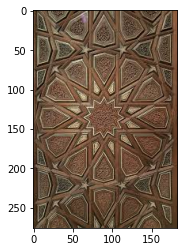

In [117]:
ex_img_name = os.listdir(path_images_dir)[10]
example_img = cv2.imread(f"{path_images_dir}/{ex_img_name}")
# por defecto cv2 carga la imagen en BGR, se transforma a RGB
example_img = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)
plt.imshow(example_img)
plt.show()

## Redimensión de imágenes

Como las imágenes son de distinto tamaño, utilizamos la función "resize_images"(creada por nosotros) que transforma todas las imagenes de un directorio a imagenes de una escala específica (por defecto 128x128).

In [158]:
%%time
# le pasamos el directorio donde están todas las imágenes
resize_images(path_images_dir, height=64, width=64, new_dir_name = "resized_paintings") 

Las imágenes se redimensionaron correctamente
CPU times: user 3.35 s, sys: 390 ms, total: 3.74 s
Wall time: 3.74 s


In [159]:
clone_images("./resized_paintings")

Se clonaron todas las imágenes correctamente


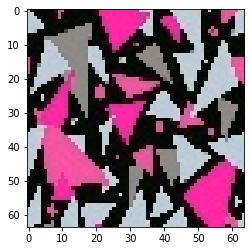

In [189]:
example_img_resized = cv2.imread("./resized_paintings/geometric_1.jpeg")
# por defecto cv2 carga la imagen en BGR, se transforma a RGB
#example_img_resized = cv2.cvtColor(example_img_resized, cv2.COLOR_BGR2RGB) 
plt.imshow(example_img_resized)
plt.show()

Las imagenes redimensionadas quedan cargadas en el mismo nivel que "path_images_dir"
Por ejemplo, si el directorio de imagenes estuviera en "my_path/dir/images", entonces el directorio de imagenes redimensionadas está en "my_path/dir/resized_images"

In [70]:
os.listdir("./resized_images")[:10]

['cubism_2933.jpeg',
 'cubism_2899.jpeg',
 'cubism_2460.jpeg',
 'cubism_2175.jpeg',
 'cubism_2525.jpeg',
 'cubism_2876.jpeg',
 'cubism_1759.jpeg',
 'cubism_1309.jpeg',
 'cubism_1923.jpeg',
 'cubism_1889.jpeg']

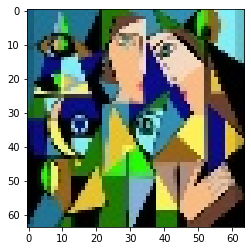

In [98]:
example_img_resized = cv2.imread("./resized_images/cubism_1.jpeg")
# por defecto cv2 carga la imagen en BGR, se transforma a RGB
example_img_resized = cv2.cvtColor(example_img_resized, cv2.COLOR_BGR2RGB) 
plt.imshow(example_img_resized)
plt.show()

Como podemos observar, ahora está redimensionada a 128x128

# Cargar el Dataset

Teniendo las imagenes redimensionadas en alguna carpeta, la función "load_data" (creada por nosotros) carga las imagenes y los labels de cada una (utilizando el nombre de la imagen). Por defecto, esta función carga los datos para imagenes de 128x128, en caso de tener otro formato, se debe pasar los parametros opcionales `width` y `height`. 

Por ejemplo, en la carpeta "resized_images" están todas las imagenes redimensionadas a 128x128, entonces load_data cargará todas las imágenes (como arreglos de numpy con forma (n, 128, 128, 3)) y con sus respectivos labels (los labels se cargan a partir del nombre del archivo, si la imagen se llama "cubism_1.jpeg", "cubism_2.jpeg", su label será "cubism". 

In [191]:
%%time
data, labels = load_data("./resized_paintings", height=64, width=64)

CPU times: user 1.86 s, sys: 769 ms, total: 2.63 s
Wall time: 2.66 s


In [192]:
print("Shape de las imágenes", data.shape)
print("Shape de labels", labels.shape)

Shape de las imágenes (12019, 64, 64, 3)
Shape de labels (12019,)


Ejemplo de imagen
shape de la imagen: (64, 64, 3)


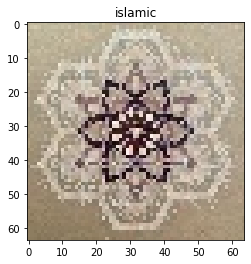

In [196]:
obs = 3450
print("Ejemplo de imagen")
print("shape de la imagen:", data[obs].shape)
plt.imshow(data[obs])
plt.title(labels[obs])
plt.show()

# DATA AUGMANTATION

In [74]:
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [75]:
augmantate = tf.keras.Sequential([
  layers.RandomCrop(height=256, width=256),
  layers.RandomContrast(factor=0.3),
  layers.RandomBrightness(factor=0.3),
  layers.Resizing(32, 32),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.6),
])

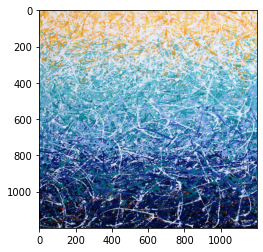

In [78]:
img = cv2.imread("original_paintings_v2/abstract/abstract_40.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

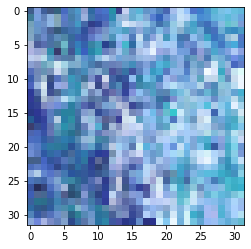

In [80]:
result = augmantate(img)
plt.imshow(result.numpy().astype("uint8"))

In [81]:
def create_dataset(path = "original_paintings_v2"):
    height = 32
    width = 32
    total_og_images = 40*3 # 40 imagenes originales x 3 clases
    clones_per_img = 125 # 125 clones por imagen

    ## inicializar los arreglos
    data = np.zeros(shape=(clones_per_img*total_og_images, height, width, 3), dtype="uint8")
    labels = np.zeros(shape=(clones_per_img*total_og_images,), dtype="uint8")

    ##  función para aumentar una imagen
    augmantate = tf.keras.Sequential([
      layers.RandomCrop(height=256, width=256),
      layers.RandomContrast(factor=0.3),
      layers.RandomBrightness(factor=0.3),
      layers.Resizing(height, width),
      layers.RandomFlip("horizontal_and_vertical"),
      layers.RandomRotation(0.6),
    ])

    ## path con las imagenes de clase
    class_paths = [f"{path}/{i}" for i in os.listdir(path) if i[0] != "."]

    idx = 0
    for label, path_class in enumerate(class_paths):
        img_paths = [f"{path_class}/{i}" for i in os.listdir(path_class) if i[0] != "."]
        for img_path in img_paths:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #img = Image.open(img_path)
            #img = np.array(img)
            for _ in range(clones_per_img):
                try:
                    result = augmantate(img).numpy().astype("uint8")
                    data[idx] = result
                    labels[idx] = label
                    idx+=1
                    if idx %1000 == 0: print(idx)
                except:
                    print("ERROR EN:", img_path)
    return data, labels

In [ ]:
data, labels = create_dataset()

# Almacenar datos en h5

In [59]:
import h5py
filename = "data_art.h5"

In [60]:
%%time
## almacenar datos en h5 para mejor optimización
numOfSamples = 15000
with h5py.File(filename, "w") as out:
    out.create_dataset("data",(numOfSamples,32,32,3),dtype='u1', data=data)
    out.create_dataset("labels",(numOfSamples,),dtype='u1', data=labels)

CPU times: user 3.65 ms, sys: 28 ms, total: 31.6 ms
Wall time: 122 ms


In [61]:
## leer datos en h5
with h5py.File(filename, "r") as f:
    data_h5 = np.array(f["data"])
    labels_h5 = np.array(f["labels"])

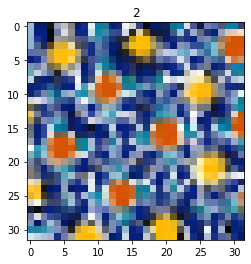

In [72]:
plt.imshow(data[13000])
plt.title(labels_h5[13000])
plt.show()